In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/dataset_processed.csv')
data_encoded = pd.get_dummies(data)


data_encoded['target_class'] = pd.qcut(data_encoded['Specific capacity'], q=10, labels=False)
X = data_encoded.drop(['Specific capacity', 'target_class'], axis=1)
y = data_encoded['Specific capacity']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [3]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=80,
                             learning_rate=0.14,
                             subsample=0.5,
                             gamma=0.1,
                             max_depth=8,
                             min_child_weight=2,
                             reg_alpha=0.26,
                             colsample_bytree=0.7,
                             colsample_bylevel=1.0,
                             colsample_bynode=0.6,
                             random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

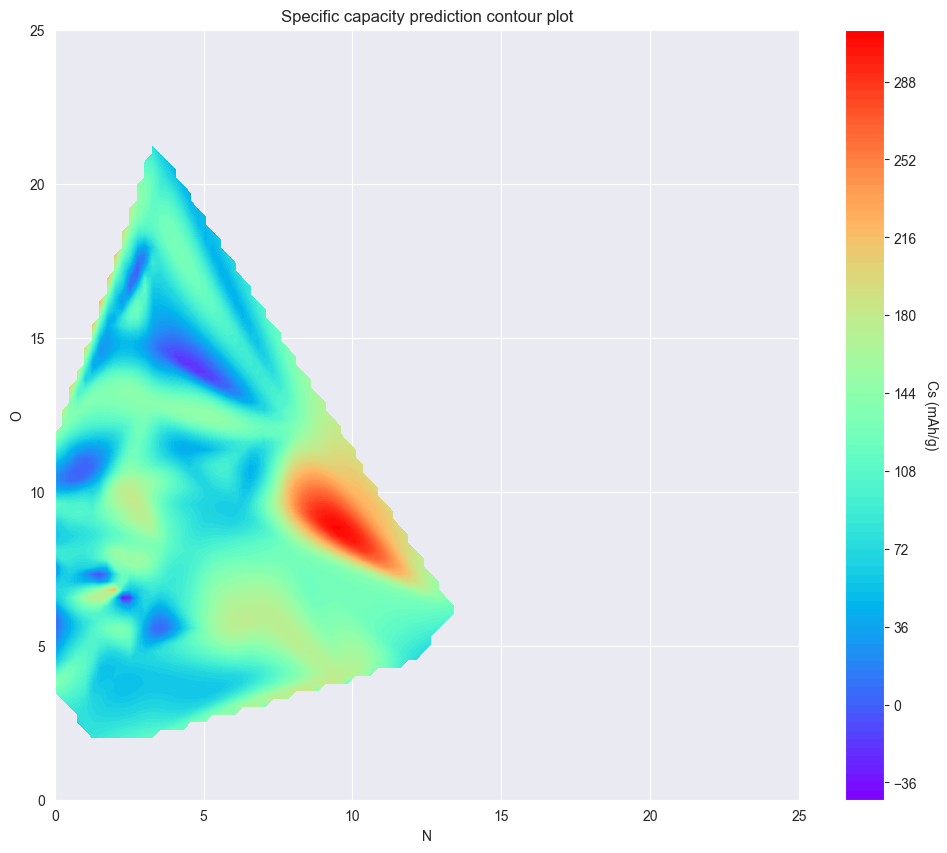

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 生成示例数据
# 这部分需要替换为你的实际数据
feature_1 = X_train['N']
feature_2 = X_train['O']
c = y_train_pred

# 创建网格数据
x = np.linspace(0, 25, 100)
y = np.linspace(0, 25, 100)
X, Y = np.meshgrid(x, y)

# 插值
Z = griddata((feature_1, feature_2), c, (X, Y), method='cubic')

# 绘制等高线图
plt.figure(figsize=(12, 10))
contour = plt.contourf(X, Y, Z, levels=100, cmap='rainbow')
cbar = plt.colorbar(contour)
cbar.set_label('Cs (mAh/g)', rotation=270, labelpad=15)

# 设置轴标签和标题
plt.xlabel('N')
plt.ylabel('O')
plt.title('Specific capacity prediction contour plot')

plt.show()
